<a href="https://colab.research.google.com/github/rklartg/Python/blob/main/Raquel_Adriana_Ortiz_Artiga_Copia_de_Proyecto_1_Data_Analytics_con_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto 1 - Proceso de generación de valor por extración de datos


Este proyecto esta diseñado para que usted pueda:

1.   Poner en práctica los conocimientos específicos del leguaje Python y las bibliotecas de Pandas, Matplotlib con Seaborn y numpy
2.   Generar una plantilla reutilizable de un proceso de limpieza, consolidación y carga de datos
3.   Aplicar los conocimientos analizando una base de datos del mundo real.

Utilizaremos el dataset superstore que puede encontar en la carpeta de datasets de Google Drive. Este es la información de ventas y ordenes de cuatro años de una tienda en línea y le permitirá hacer análisis de ventas, categorías etc.

Mantenga en mente que algunos errores en carga y limpieza de datos pueden surgir. Su tarea es identificarlos y sobreponerse a ellos.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from google.colab import drive

In [ ]:
import os 

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importar Datos e Identificar variables a limpiar

In [ ]:
path = r'/content/drive/MyDrive/superstore'
files = os.listdir(path)
SSTORE = pd.DataFrame()

for file in files:
  df_temp = pd.read_csv(path + "/"+ file, encoding= 'unicode_escape')
  df_temp['File_name'] = file

  AllFile_STORE = pd.concat([SSTORE,df_temp], axis=0, ignore_index=True)

In [ ]:
AllFile_STORE.dtypes

Row ID              int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
City               object
State              object
Country            object
Postal Code       float64
Market             object
Region             object
Product ID         object
Category           object
Sub-Category       object
Product Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping Cost     float64
Order Priority     object
File_name          object
dtype: object

In [ ]:
AllFile_STORE.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority', 'File_name'],
      dtype='object')

# Limpieza de Datos

In [ ]:
AllFile_STORE.isna().sum()

Row ID               0
Order ID             0
Order Date           0
Ship Date            0
Ship Mode            0
Customer ID          0
Customer Name        0
Segment              0
City                 0
State                0
Country              0
Postal Code       8355
Market               0
Region               0
Product ID           0
Category             0
Sub-Category         0
Product Name         0
Sales                0
Quantity             0
Discount             0
Profit               0
Shipping Cost        0
Order Priority       0
File_name            0
dtype: int64

In [ ]:
AllFile_STORE.shape

(10260, 25)

In [ ]:
#Para eliminar duplicados será suficiente hacer:
SSTORE_1 = AllFile_STORE.drop_duplicates()

SSTORE_1.shape

(10260, 25)

In [ ]:
AllFile_STORE['Postal Code'].unique()

array([   nan, 90032., 35601., 90004.,  4240., 45503., 30076., 60623.,
       19805., 77070., 91104., 11561., 60610., 90036., 31907., 10035.,
       43302., 98031., 33710., 90049., 77095., 31204., 90008., 45014.,
       19143., 27405., 91767., 92399., 47374., 30062., 75007., 10024.,
       33801., 10011., 19134., 50315., 92630., 98103., 21044., 32839.,
       79762., 85281., 28205., 43229., 92804., 47201., 30318., 28540.,
       19120., 22153., 80004., 80027., 13501., 48066.,  2895., 21215.,
       98026., 23223.,  8701., 10550., 40214., 87105., 26003., 75081.,
       61107., 94110., 75217., 28110., 77041., 92404., 59601., 19711.,
       33178., 80013., 37087., 92024., 44134., 46350., 85204., 85301.,
       43055., 78745., 17602., 98632., 32303., 98115., 95051., 85023.,
       42420., 92592., 92503.,  2151., 44052., 49201., 10009., 94109.,
       71111., 29464., 28027., 65807., 14609., 44312., 20735., 39212.,
       98105., 55407., 60653., 23320., 84321., 32216., 92646.,  3820.,
      

In [ ]:
AllFile_STORE['Category'].unique()

array(['Technology', 'Furniture', 'Office Supplies'], dtype=object)

In [ ]:
AllFile_STORE['Sub-Category'].unique()

array(['Copiers', 'Bookcases', 'Chairs', 'Storage', 'Fasteners',
       'Binders', 'Paper', 'Accessories', 'Art', 'Envelopes',
       'Furnishings', 'Labels', 'Appliances', 'Phones', 'Supplies',
       'Machines', 'Tables'], dtype=object)

In [ ]:
AllFile_STORE.drop(['Row ID'], axis=1, inplace=True)

In [ ]:
AllFile_STORE.drop(['Postal Code'], axis=1, inplace=True)

In [ ]:
AllFile_STORE.drop(['File_name'], axis=1, inplace=True)

# Creación de nueva base de datos en Google Drive

In [ ]:
from google.colab import files

In [ ]:
AllFile_STORE.to_csv('STORE_FINAL.csv', index=False)
files.download('STORE_FINAL.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Explorando datos

Conectar a la nueva base de datos

In [ ]:
SSTORE = pd.read_csv('/content/STORE_FINAL.csv')

In [ ]:
SSTORE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10260 entries, 0 to 10259
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        10260 non-null  object 
 1   Order Date      10260 non-null  object 
 2   Ship Date       10260 non-null  object 
 3   Ship Mode       10260 non-null  object 
 4   Customer ID     10260 non-null  object 
 5   Customer Name   10260 non-null  object 
 6   Segment         10260 non-null  object 
 7   City            10260 non-null  object 
 8   State           10260 non-null  object 
 9   Country         10260 non-null  object 
 10  Market          10260 non-null  object 
 11  Region          10260 non-null  object 
 12  Product ID      10260 non-null  object 
 13  Category        10260 non-null  object 
 14  Sub-Category    10260 non-null  object 
 15  Product Name    10260 non-null  object 
 16  Sales           10260 non-null  float64
 17  Quantity        10260 non-null 

In [ ]:
SSTORE.describe()

,Sales,Quantity,Discount,Profit,Shipping Cost
count,10260.000000,10260.000000,10260.000000,10260.000000,10260.000000
mean,257.484133,3.514815,0.143466,29.231994,27.821439
std,547.669330,2.293648,0.213467,180.146915,61.540804
min,0.990000,1.000000,0.000000,-3399.980000,0.000000
25%,31.786000,2.000000,0.000000,-0.028650,2.690000
50%,87.035000,3.000000,0.000000,8.999700,7.935000
75%,255.962000,5.000000,0.200000,36.720000,25.485000
max,22638.480000,14.000000,0.850000,5039.985600,915.490000


In [ ]:
SSTORE.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,MX-2011-157049,13-06-2011,13-06-2011,Same Day,BD-11560,Brendan Dodson,Home Office,Cuajimalpa,Distrito Federal,Mexico,...,TEC-CO-10003964,Technology,Copiers,"Canon Fax Machine, High-Speed",631.91364,3,0.002,87.35364,78.28,Critical
1,ES-2011-1276768,13-06-2011,18-06-2011,Standard Class,JO-15145,Jack O'Briant,Corporate,Thonon-les-Bains,Rhône-Alpes,France,...,FUR-BO-10000847,Furniture,Bookcases,"Dania Stackable Bookrack, Mobile",437.72400,4,0.100,165.32400,68.34,High
2,US-2011-102288,13-06-2011,17-06-2011,Standard Class,KT-16465,Kean Takahito,Consumer,Presidente Dutra,Maranhão,Brazil,...,FUR-CH-10004801,Furniture,Chairs,"Office Star Bag Chairs, Set of Two",215.37600,14,0.600,-231.78400,39.85,High
3,ES-2011-1276768,13-06-2011,18-06-2011,Standard Class,JO-15145,Jack O'Briant,Corporate,Thonon-les-Bains,Rhône-Alpes,France,...,FUR-BO-10000895,Furniture,Bookcases,"Sauder Corner Shelving, Metal",264.16800,2,0.100,55.72800,30.14,High
4,IN-2011-51390,13-06-2011,17-06-2011,Standard Class,RB-19705,Roger Barcio,Home Office,Palembang,Sumatera Selatan,Indonesia,...,FUR-CH-10000660,Furniture,Chairs,"Novimex Executive Leather Armchair, Adjustable",332.52960,1,0.270,18.21960,30.14,Medium


# Analizando Categorías, tendencias, medias y creando valor

Su función será crear un "deep dive" que explorara 2 a 4 preguntas de negocios que pueda hacer con los datos: ¿Cuál es el mejor día de la semana de ventas? etc. Como mínimo su análisis debe incluir:

- Comparar dos variables con al menos una segmentación por categoría
- Analizar gráficamente multiples variables numéricas
- Plot charts, Gráficos de tendencia y Barra con su análisis de que significa
- Utilizar las ideas anteriores como sea necesario para cada pregunta de negocio.



In [ ]:
SSTORE.Market.value_counts(normalize=True) * 100

APAC      21.608187
EU        20.341131
LATAM     20.038986
US        18.567251
EMEA       9.502924
Africa     9.249513
Canada     0.692008
Name: Market, dtype: float64

In [ ]:
SSTORE['Category'].value_counts()

Office Supplies    6221
Technology         2055
Furniture          1984
Name: Category, dtype: int64

In [ ]:
SSTORE['Sub-Category'].value_counts()

Binders        1240
Storage        1022
Art             939
Paper           706
Phones          683
Chairs          680
Furnishings     641
Accessories     637
Labels          526
Bookcases       487
Supplies        486
Fasteners       483
Envelopes       472
Copiers         432
Appliances      347
Machines        303
Tables          176
Name: Sub-Category, dtype: int64

In [ ]:
pd.crosstab(SSTORE.Market, SSTORE['Sub-Category'])

Sub-Category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
Market,,,,,,,,,,,,,,,,,
APAC,138,70,128,206,122,208,116,132,127,121,161,66,128,145,165,135,49
Africa,46,28,130,130,43,24,35,50,47,40,44,46,53,51,127,47,8
Canada,4,5,12,12,1,2,0,1,5,3,7,0,3,6,8,2,0
EMEA,39,29,146,129,44,40,38,41,52,60,38,45,32,57,134,43,8
EU,100,64,276,287,92,98,97,74,89,111,86,97,95,129,276,95,21
LATAM,153,69,102,186,141,187,134,126,124,118,123,23,123,134,156,125,32
US,157,82,145,290,44,121,12,48,39,188,67,26,272,161,156,39,58


In [ ]:
SSTORE.corr()

,Sales,Quantity,Discount,Profit,Shipping Cost
Sales,1.000000,0.295868,-0.078181,0.449103,0.746672
Quantity,0.295868,1.000000,-0.018666,0.106641,0.278278
Discount,-0.078181,-0.018666,1.000000,-0.309973,-0.081511
Profit,0.449103,0.106641,-0.309973,1.000000,0.421342
Shipping Cost,0.746672,0.278278,-0.081511,0.421342,1.000000


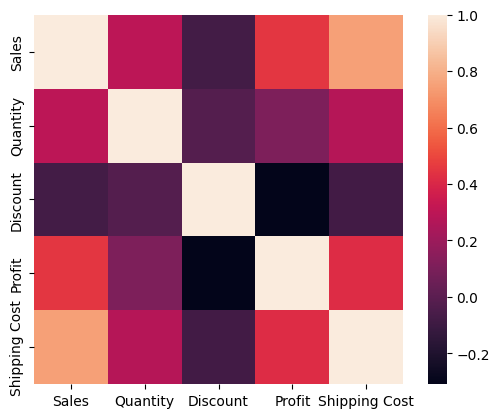

In [ ]:
corrmat = SSTORE.corr()
sns.heatmap(corrmat, vmax=1, square=True); 

<ipython-input-60-1b18fe760a1b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(SSTORE.Discount * 100, ax=x)


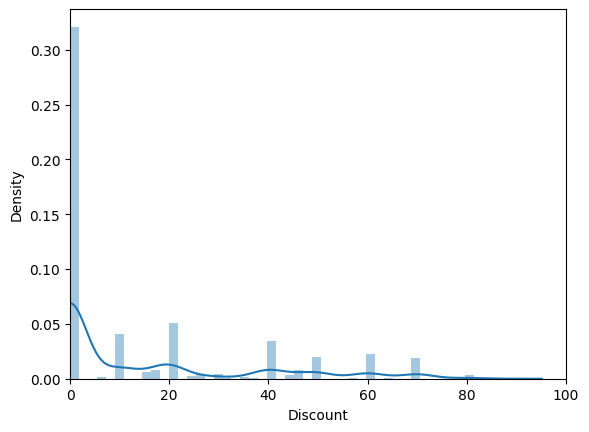

In [ ]:
fig, x = plt.subplots()
sns.distplot(SSTORE.Discount * 100, ax=x)
x.set_xlim(0, 100)
plt.show()

<ipython-input-61-02afbc775122>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(SSTORE.Profit, ax=x)


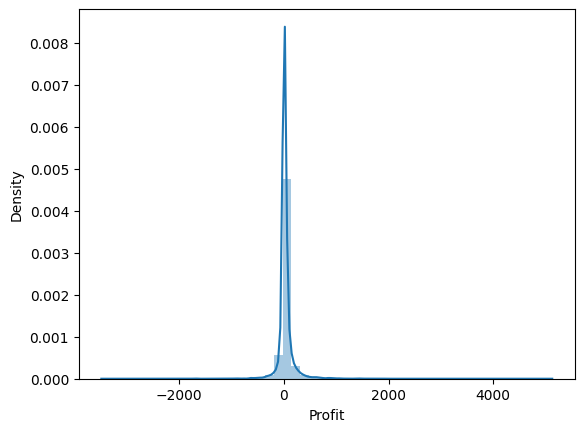

In [ ]:
fig, x = plt.subplots()
sns.distplot(SSTORE.Profit, ax=x)
plt.show()

<Axes: xlabel='count', ylabel='Market'>

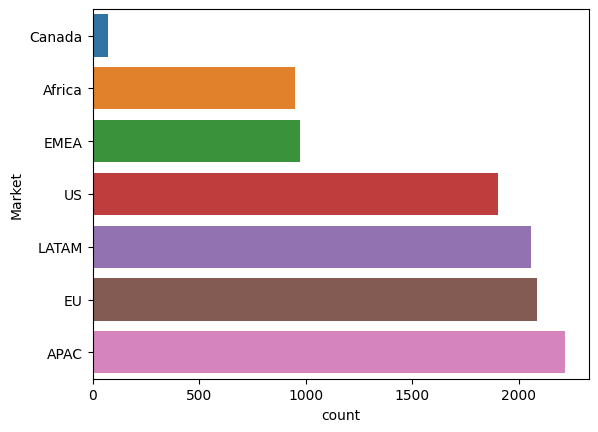

In [ ]:
sns.countplot(y=SSTORE.Market, order=SSTORE.Market.value_counts(ascending=True).index)

<Axes: xlabel='Sales', ylabel='Profit'>

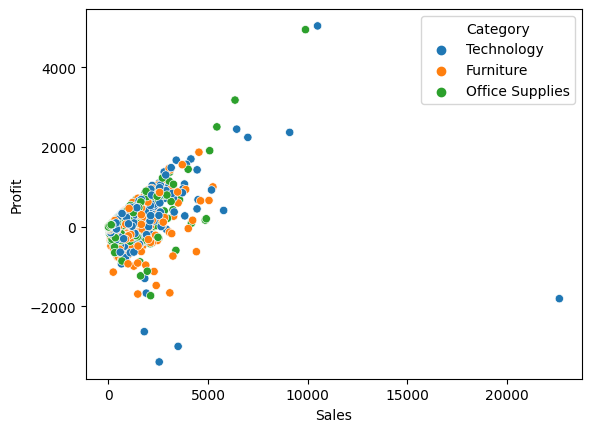

In [ ]:
sns.scatterplot(x=SSTORE.Sales, y=SSTORE.Profit, hue=SSTORE['Category'])

In [ ]:
SSTORE.groupby(SSTORE['Order Date']).count().sort_values(['Sales'],ascending=False)

,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
Order Date,,,,,,,,,,,,,,,,,,,,,
18-06-2014,135,135,135,135,135,135,135,135,135,135,...,135,135,135,135,135,135,135,135,135,135
18-11-2014,127,127,127,127,127,127,127,127,127,127,...,127,127,127,127,127,127,127,127,127,127
13-11-2014,114,114,114,114,114,114,114,114,114,114,...,114,114,114,114,114,114,114,114,114,114
13-11-2012,106,106,106,106,106,106,106,106,106,106,...,106,106,106,106,106,106,106,106,106,106
13-06-2013,102,102,102,102,102,102,102,102,102,102,...,102,102,102,102,102,102,102,102,102,102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17-03-2013,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
15-07-2012,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
16-01-2011,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


# Conclusiones

El continente que mas genera ventas es APAC, el dia que mas ordenes recivio fue 18/06/2014, que no tiene mucho descuentas y asi como ha tenido ganacias a tenido perdidas